### Pretrained CNN model(VGG Net) as a feature extractor with image augmentation

In [22]:
import glob
from IPython.display import Image

In [23]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# from keras.preprocessing.image import  img_to_array, array_to_img
from tensorflow.keras.utils import load_img, img_to_array, array_to_img

from random import sample, randint 

In [24]:
location_train = r"C:\Users\keert\Downloads\archive\dataset"

In [25]:
train_dir = location_train+'\\'+'training_set'
val_dir   = location_train+'\\'+'test_set'

In [37]:
train_dir,val_dir

('C:\\Users\\keert\\Downloads\\archive\\dataset\\training_set',
 'C:\\Users\\keert\\Downloads\\archive\\dataset\\test_set')

In [38]:
train_files = glob.glob(train_dir+'/*')

In [40]:
train_files[2],len(train_files)

('C:\\Users\\keert\\Downloads\\archive\\dataset\\training_set\\cat.100.jpg',
 8010)

<class 'PIL.JpegImagePlugin.JpegImageFile'> JPEG RGB (349, 262)


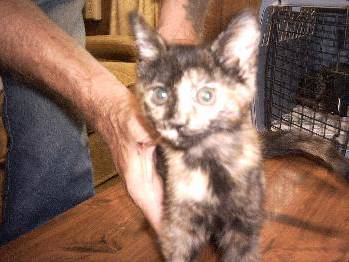

In [42]:
# load a random image
img = load_img(train_files[randint(0, len(train_files))])

# report details about the image
print(type(img), img.format, img.mode, img.size)

array_to_img(img)

### Load all images

In [55]:
# To make all images to same dimension
IMG_DIM = (150, 150)
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]

In [64]:
# train_imgs = [img_to_array(load_img(img)) for img in train_files]
# # train_imgs[1],train_imgs[2],train_imgs[3]
len(train_imgs)
# train_imgs[2][1]

8010

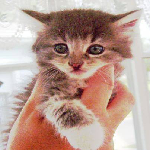

In [56]:
array_to_img(train_imgs[2])

In [61]:
#convert to numpy array 


train_imgs = np.array(train_imgs)
train_imgs.shape

(8010, 150, 150, 3)

In [79]:
#extract Labels

train_labels = [fn.split('.')[0].split('\\')[-1] for fn in train_files]
len(train_labels)

8010

In [81]:
train_labels[:5]

['cat', 'cat', 'cat', 'cat', 'cat']

In [66]:
validation_files = glob.glob(val_dir+'/*')

validation_imgs   = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs   = np.array(validation_imgs)
validation_labels = [fn.split('.')[0].split('\\')[-1] for fn in validation_files]
len(validation_labels)

2000

In [67]:
print('Train dataset shape:', train_imgs.shape, '\nValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (8010, 150, 150, 3) 
Validation dataset shape: (2000, 150, 150, 3)


### We will now scale each image with pixel values between (0, 255) to values between (0, 1) because deep earning models work really well with small input values:


In [68]:
train_imgs_scaled      = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')

train_imgs_scaled      /= 255
validation_imgs_scaled /= 255

print('Train dataset shape:', train_imgs_scaled.shape, '\nValidation dataset shape:', validation_imgs_scaled.shape)

Train dataset shape: (8010, 150, 150, 3) 
Validation dataset shape: (2000, 150, 150, 3)


(150, 150, 3)


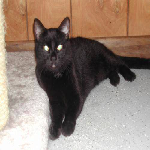

In [72]:
# visualize a sample image
print(train_imgs[0].shape)
array_to_img(train_imgs[10])

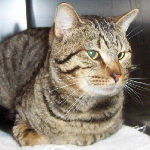

In [75]:
array_to_img(validation_imgs[185])

### convert labels to numeric

In [77]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder

In [123]:
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)
# LabelEncoder()

In [124]:
le.classes_

array(['cat', 'dog'], dtype='<U3')

In [126]:
print(train_labels[3980:4050], train_labels_enc[3980:4050])

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [127]:
print( train_labels_enc[:])

[0 0 0 ... 1 1 1]


## LOAD VGG MODEL

In [ ]:
import keras 
from keras.applications import vgg16
from keras.models import Model

In [131]:
batch_size  = 30
num_classes = 2
epochs      = 30
input_shape = (150, 150, 3)

In [132]:
vgg = vgg16.VGG16(include_top = False, 
                  weights     = 'imagenet', 
                  input_shape = input_shape)

58889256/58889256 [==============================] - 4s 0us/step


In [133]:
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

In [138]:
vgg_model = Model(vgg.input, output)

vgg_model.trainable = True

set_trainable = False

for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1','block3_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
#print("Trainable layers:", vgg_model.trainable_weights)

In [139]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_1,False
1,<keras.layers.convolutional.conv2d.Conv2D obje...,block1_conv1,False
2,<keras.layers.convolutional.conv2d.Conv2D obje...,block1_conv2,False
3,<keras.layers.pooling.max_pooling2d.MaxPooling...,block1_pool,False
4,<keras.layers.convolutional.conv2d.Conv2D obje...,block2_conv1,False
5,<keras.layers.convolutional.conv2d.Conv2D obje...,block2_conv2,False
6,<keras.layers.pooling.max_pooling2d.MaxPooling...,block2_pool,False
7,<keras.layers.convolutional.conv2d.Conv2D obje...,block3_conv1,True
8,<keras.layers.convolutional.conv2d.Conv2D obje...,block3_conv2,True
9,<keras.layers.convolutional.conv2d.Conv2D obje...,block3_conv3,True


In [140]:
import tensorflow
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from tensorflow.keras import optimizers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

## Data Generators

In [142]:
from keras.preprocessing.image import ImageDataGenerator

In [143]:
train_datagen = ImageDataGenerator(rescale           = 1./255, 
                                   zoom_range        = 0.3, 
                                   rotation_range    = 50,
                                   width_shift_range = 0.2, 
                                   height_shift_range= 0.2, 
                                   shear_range       = 0.2, 
                                   horizontal_flip   = True, 
                                   fill_mode         = 'nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [144]:
train_generator = train_datagen.flow(train_imgs, 
                                     train_labels_enc, 
                                     batch_size=32)

val_generator   = val_datagen.flow(validation_imgs, 
                                   validation_labels_enc, 
                                   batch_size=32)

input_shape = (150, 150, 3)

In [145]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

We are giving less learning rate    since we don't want to get stuck at any local minimal, and we also do not want to suddenly update the weights of the trainable VGG-16 model layers by a big factor that might adversely affect the model:

In [147]:
input_shape = vgg_model.output_shape[1]

model = Sequential()

model.add(vgg_model)

model.add(InputLayer(input_shape=(input_shape,)))

model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss     = 'binary_crossentropy',
              optimizer= optimizers.RMSprop(learning_rate=2e-5),
              metrics  = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 8192)              14714688  
                                                                 
 input_2 (InputLayer)        multiple                  0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5

In [149]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch  = 10, 
                              epochs           = 10,
                              validation_data  = val_generator, 
                              validation_steps = 10, 
                              verbose          = 1,
                              callbacks=[early_stop, tfdocs.modeling.EpochDots()])

C:\Users\keert\AppData\Local\Temp\ipykernel_43792\1012051279.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.3764 - accuracy: 0.8438
Epoch: 0, accuracy:0.8438,  loss:0.3764,  val_accuracy:0.7344,  val_loss:0.6178,  
10/10 [==============================] - 169s 18s/step - loss: 0.3764 - accuracy: 0.8438 - val_loss: 0.6178 - val_accuracy: 0.7344
Epoch 2/10
10/10 [==============================] - 171s 18s/step - loss: 0.3954 - accuracy: 0.8469 - val_loss: 0.2876 - val_accuracy: 0.8687
Epoch 3/10
10/10 [==============================] - 170s 18s/step - loss: 0.4057 - accuracy: 0.8062 - val_loss: 0.1924 - val_accuracy: 0.9260
Epoch 4/10
10/10 [==============================] - 157s 17s/step - loss: 0.3533 - accuracy: 0.8562 - val_loss: 0.2415 - val_accuracy: 0.9083
Epoch 5/10
10/10 [==============================] - 159s 17s/step - loss: 0.3002 - accuracy: 0.8687 - val_loss: 0.1935 - val_accuracy: 0.9198
Epoch 6/10
10/10 [==============================] - 168s 18s/step - loss: 0.3515 - accuracy: 0.8438 - val_loss: 0.2651 - val

We can see from the preceding output that our model has obtained a validation accuracy of around 93%

Let's observe the model accuracy and loss plots:

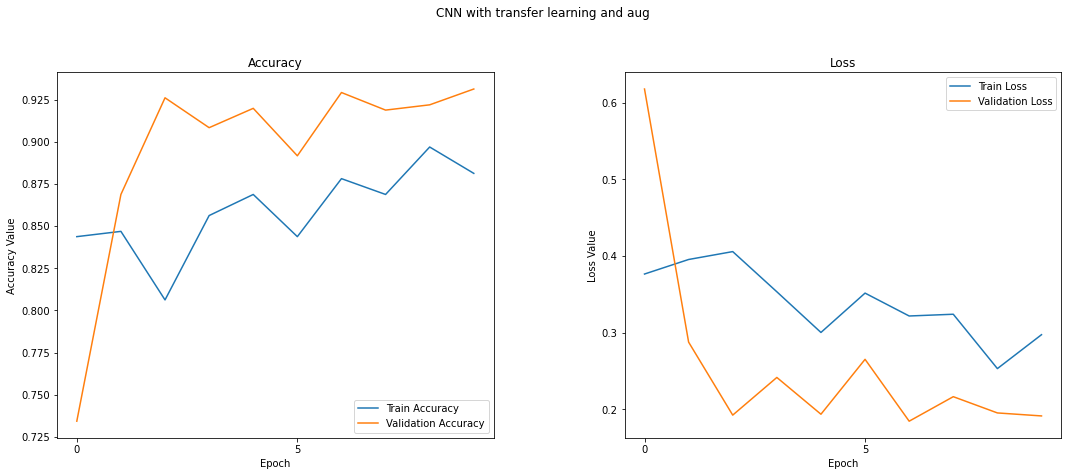

In [150]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
t = f.suptitle('CNN with transfer learning and aug', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,31))

ax1.plot(range(len(history.history['accuracy'])), history.history['accuracy'],     label='Train Accuracy')
ax1.plot(range(len(history.history['accuracy'])), history.history['val_accuracy'], label='Validation Accuracy')

ax1.set_xticks(np.arange(0, len(history.history['accuracy']), 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(range(len(history.history['accuracy'])), history.history['loss'],     label='Train Loss')
ax2.plot(range(len(history.history['accuracy'])), history.history['val_loss'], label='Validation Loss')

ax2.set_xticks(np.arange(0, len(history.history['accuracy']), 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

Saving model/parameters

In [152]:
import pickle
import os

In [153]:
def model_save(model, encoder, model_save_path):
    _create_folder_if_it_doesnt_exist(model_save_path)
    _save_parameters(model_save_path)
    _save_weights(model_save_path)
    _save_encoder(model_save_path, encoder)

def _create_folder_if_it_doesnt_exist(model_save_path):
    if not os.path.exists(model_save_path):
        os.makedirs(model_save_path)

def _save_parameters(model_save_path):
    parameters = [
        input_shape,
    ]
    save_parameters_file = os.path.join(model_save_path, "05_CNN_TL_aug_parameters.pkl")
    with open(save_parameters_file, "wb") as f:
        pickle.dump(parameters, f)

def _save_weights(model_save_path):
    save_weights_file = os.path.join(model_save_path, "05_CNN_TL_aug__weights.h5")
    model.save_weights(save_weights_file)
    
def _save_encoder(model_save_path, encoder):
    save_encoder_file = os.path.join(model_save_path, "05_CNN_TL_aug__encoder.pkl")
    with open(save_encoder_file, "wb") as f:
        pickle.dump(encoder, f)



In [154]:
model_save_path = './transfer_learning_models_save'

model_save(model=model, encoder=le, model_save_path=model_save_path)